In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
df = load_breast_cancer()

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
X = df.data
y = df.target

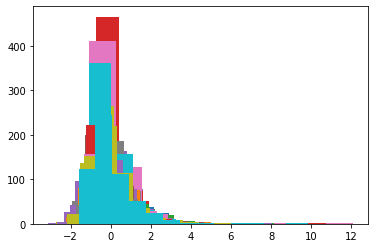

In [13]:
X_scaled = StandardScaler().fit_transform(X)
for i in range(X_scaled.shape[1]):
    plt.hist(X_scaled[:,i])

Text(0.5, 1.0, 'target')

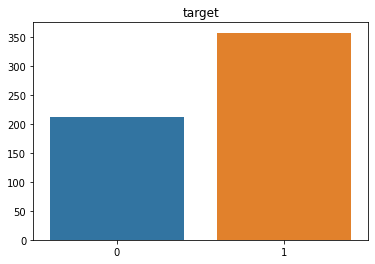

In [23]:
cat , cnts = np.unique(y,return_counts=True)
sns.barplot(cat , cnts)
plt.title('target')

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25)

In [49]:
model = XGBClassifier(max_depth=2)

In [50]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': 2,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [51]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

[15:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.965034965034965

In [59]:
ypred = model.predict(x_test)
ypred_prob = model.predict_proba(x_test)[:,1]

In [53]:
cm = metrics.confusion_matrix(y_test,ypred)

[Text(0.5, 0, 'malignant'), Text(1.5, 0, 'benign')]

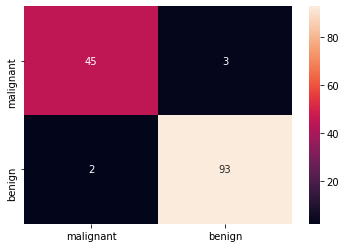

In [87]:
m =sns.heatmap(cm,annot=True)
m.set_yticklabels(df.target_names)
m.set_xticklabels(df.target_names)

In [60]:
print(metrics.roc_auc_score(y_test,ypred_prob))

0.9879385964912281

In [77]:
falseRate,trueRate,_ = metrics.roc_curve(y_test,ypred_prob)

Text(0.5, 0, 'falseRate')

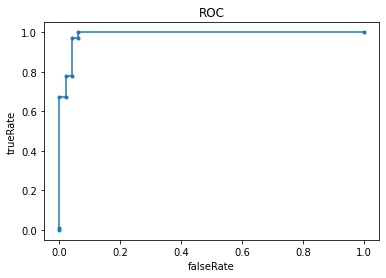

In [91]:
plt.plot(falseRate,trueRate,marker='.')
plt.title('ROC')
plt.ylabel('trueRate')
plt.xlabel('falseRate')


In [92]:
from lightgbm import LGBMClassifier

In [93]:
model2 = LGBMClassifier()
model.fit(x_train,y_train)

[16:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
ypred2 = model.predict(x_test)
ypred2_prob = model.predict_proba(x_test)[:,1]

[Text(0.5, 0, 'malignant'), Text(1.5, 0, 'benign')]

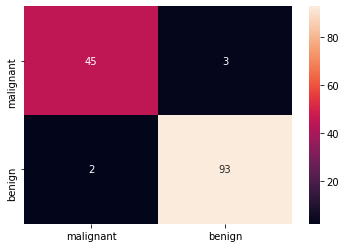

In [95]:
cm = metrics.confusion_matrix(y_test,ypred)
m =sns.heatmap(cm,annot=True)
m.set_yticklabels(df.target_names)
m.set_xticklabels(df.target_names)

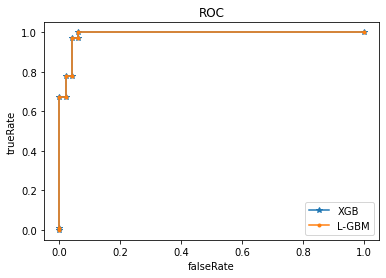

In [105]:
falseRate,trueRate,_ = metrics.roc_curve(y_test,ypred_prob)
plt.plot(falseRate,trueRate,marker='*')
falseRate,trueRate,_ = metrics.roc_curve(y_test,ypred2_prob)
plt.plot(falseRate,trueRate,marker='.')
plt.title('ROC')
plt.ylabel('trueRate')
plt.xlabel('falseRate')
plt.legend(['XGB','L-GBM'])
